In [1]:
# Project: Telco Customer Churn Prediction
# Phase 1: Project Setup and Initial Data Exploration

# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner outputs
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# 2. Load Dataset

try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Dataset loaded successfully.")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'WA_Fn-UseC_-Telco-Customer-Churn.csv' not found.")
    print("Please download the dataset from Kaggle and place it in the same directory.")
    df = None # Set df to None to prevent errors later

Dataset loaded successfully.
Dataset shape: (7043, 21)


In [3]:
# 3. Initial Data Inspection

if df is not None:
    print("\n--- First 5 Rows of the dataset ---")
    print(df.head())

    print("\n--- Dataset Information (column types, non-null counts) ---")
    print(df.info())

    print("\n--- Basic Statistical Summary of Numerical Columns ---")
    print(df.describe())


--- First 5 Rows of the dataset ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV

In [4]:
if df is not None:
    print("\n--- Check for Missing Values ---")
    print(df.isnull().sum())

    print("\n--- Unique Values in 'Churn' column (target variable) ---")
    print(df['Churn'].value_counts())
    print(f"Churn rate: {df['Churn'].value_counts(normalize=True)['Yes']:.2%}")

    print("\n--- Handling 'TotalCharges' column ---")
    # 'TotalCharges' is currently an object type, but should be numeric.
    # Contains spaces for new customers with no charges yet - will need to be handled
    print(f"Original unique values in 'TotalCharges': {df['TotalCharges'].unique()}")
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    # Fill missing TotalCharges (now NaN from using 'coerce') with 0 as they are most likely new customers
    df['TotalCharges'].fillna(0, inplace=True)
    print(f"After conversion, minTotalCharges: {df['TotalCharges'].min()}")


--- Check for Missing Values ---
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

--- Unique Values in 'Churn' column (target variable) ---
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn rate: 26.54%

--- Handling 'TotalCharges' column ---
Original unique values in 'TotalCharges': ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
After conversion, minTotalCharges: 0.0


In [5]:
if df is not None:
    print("\n--- Drop 'customerID' column (not needed for prediction) ---")
    df.drop('customerID', axis=1, inplace=True)
    print(f"Dataset shape after dropping customerID: {df.shape}")

    print("\n--- Renaming 'Churn' column values for clarity ---")
    # Replace 'Yes' with 1 and 'No' with 0 for the target variable
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
    print(df['Churn'].value_counts())


--- Drop 'customerID' column (not needed for prediction) ---
Dataset shape after dropping customerID: (7043, 20)

--- Renaming 'Churn' column values for clarity ---
Churn
0    5174
1    1869
Name: count, dtype: int64


In [6]:
if df is not None:
    print("\n--- Identify Categorical and Numerical Features ---")
    categorical_features = df.select_dtypes(include='object').columns.tolist()
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    # Remove 'Churn' from numerical if it was included
    if 'Churn' in numerical_features:
        numerical_features.remove('Churn')

    print(f"Categorical Features: {categorical_features}")
    print(f"Numerical Features: {numerical_features}")


--- Identify Categorical and Numerical Features ---
Categorical Features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical Features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']



--- Visualising Churn Distribution ---


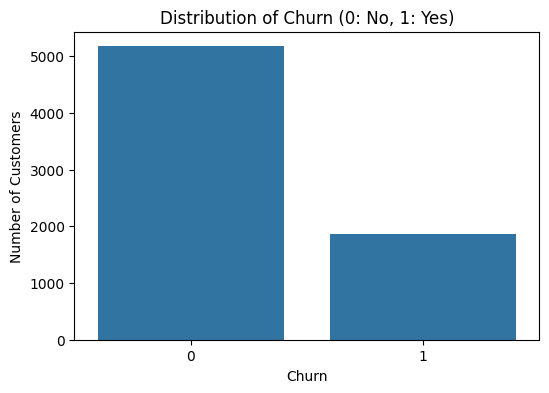

In [7]:
# 4. Basic Exploration Data Analysis (EDA)

if df is not None:
    print("\n--- Visualising Churn Distribution ---")
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Churn', data=df)
    plt.title('Distribution of Churn (0: No, 1: Yes)')
    plt.xlabel('Churn')
    plt.ylabel('Number of Customers')
    plt.show()


--- Visualising Distribution of Numerical Features ---


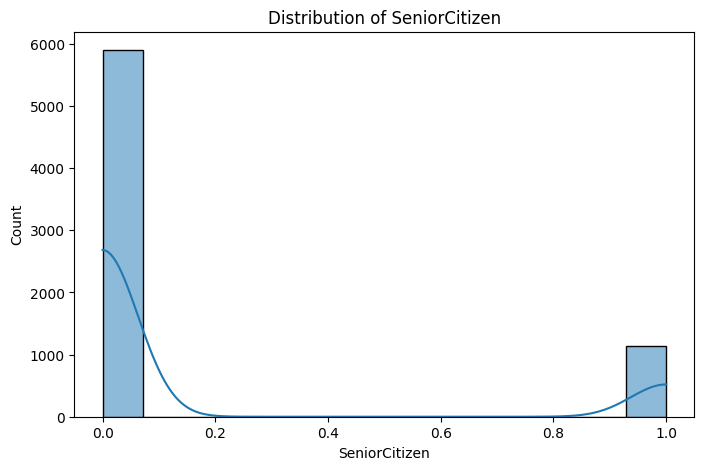

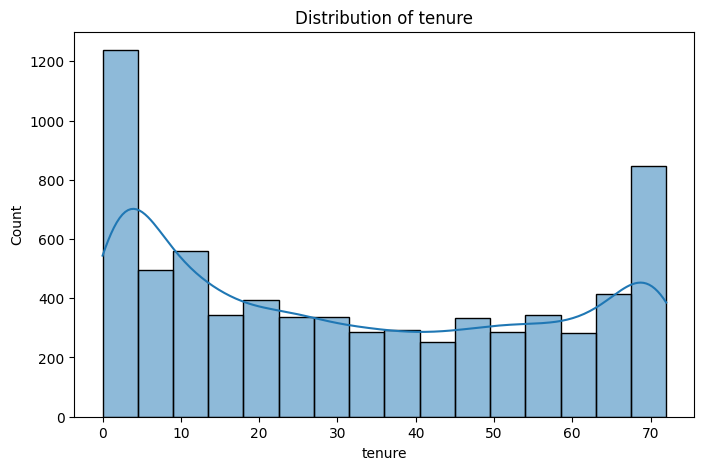

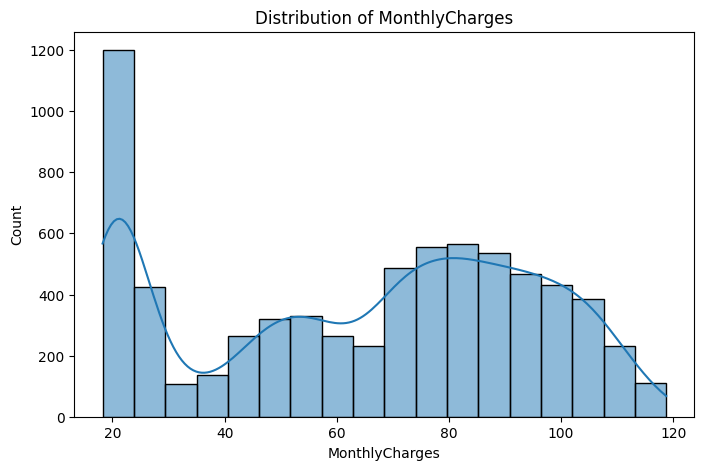

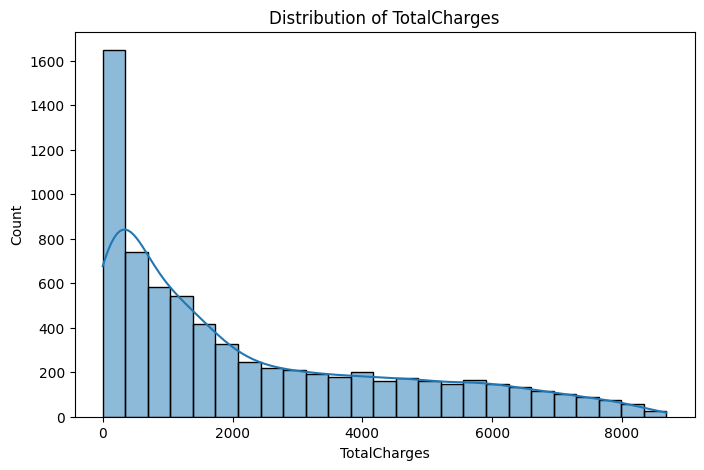

In [8]:
if df is not None:
    print("\n--- Visualising Distribution of Numerical Features ---")
    for col in numerical_features:
        # Loop through numerical features and plot distributions
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()


--- Visualising Churn vs. Categorical Features ---


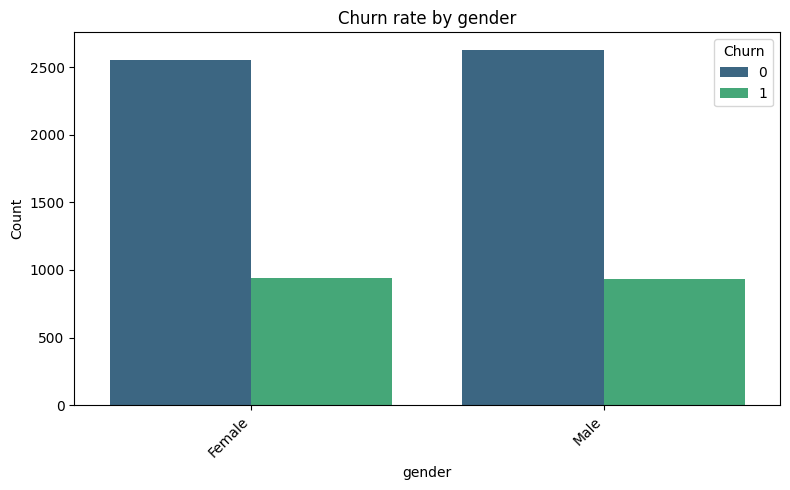

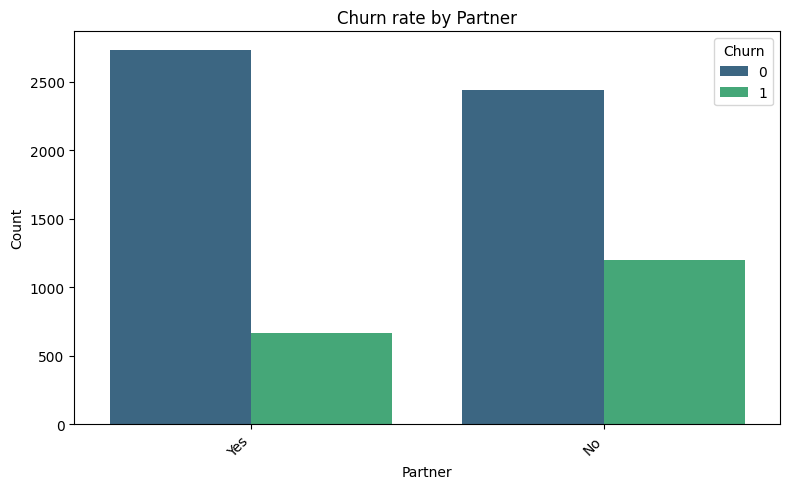

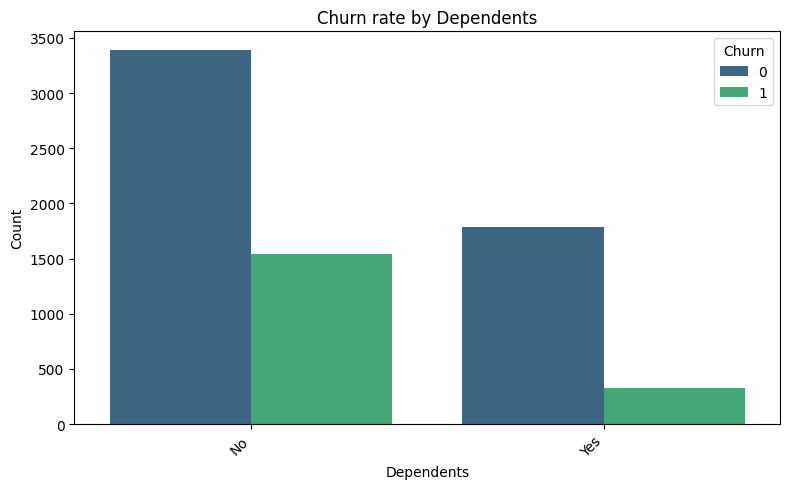

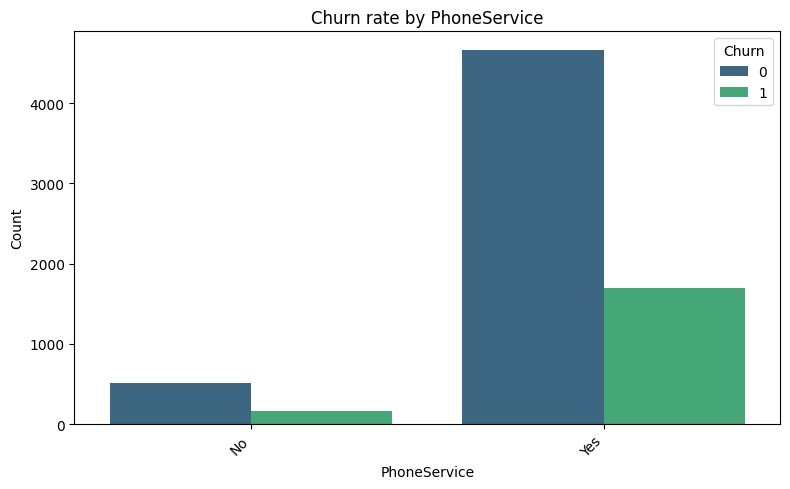

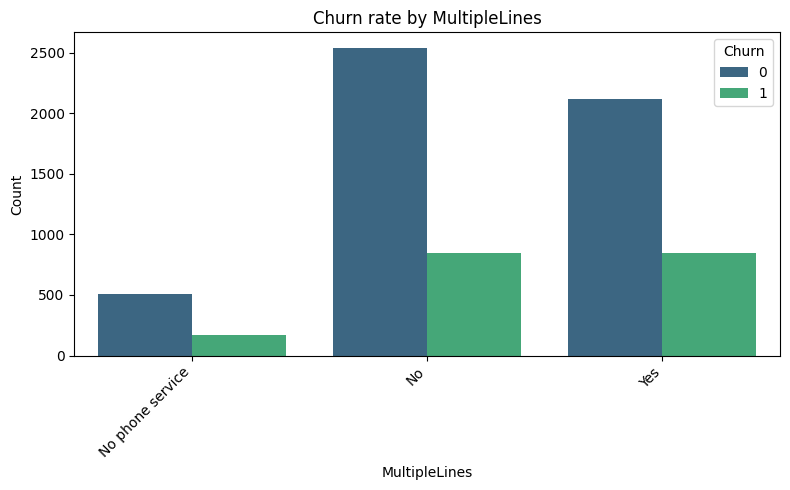

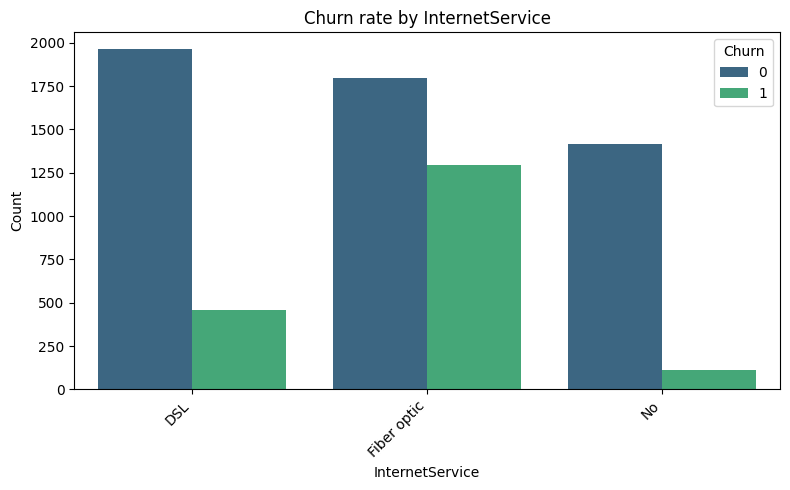

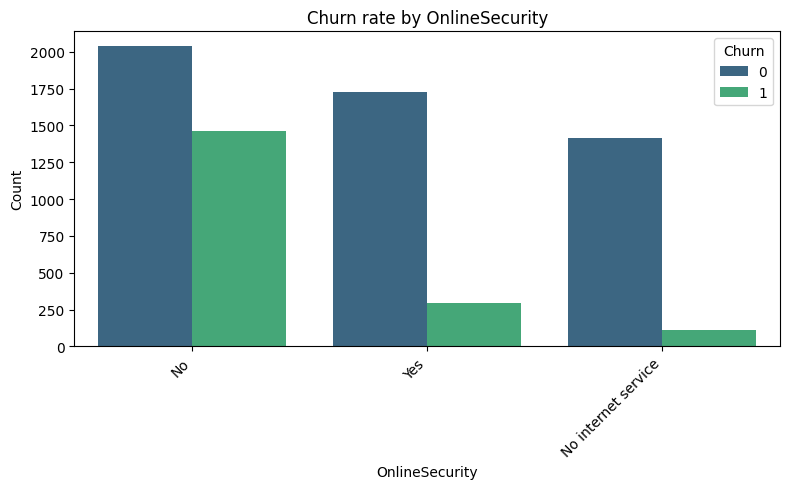

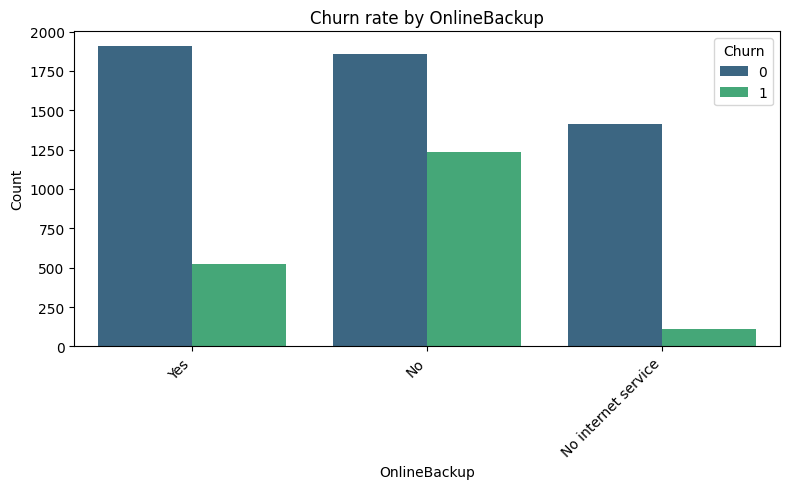

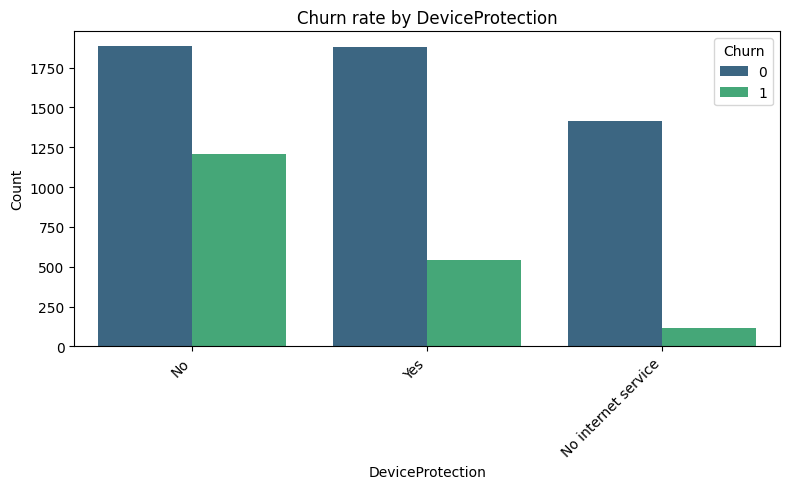

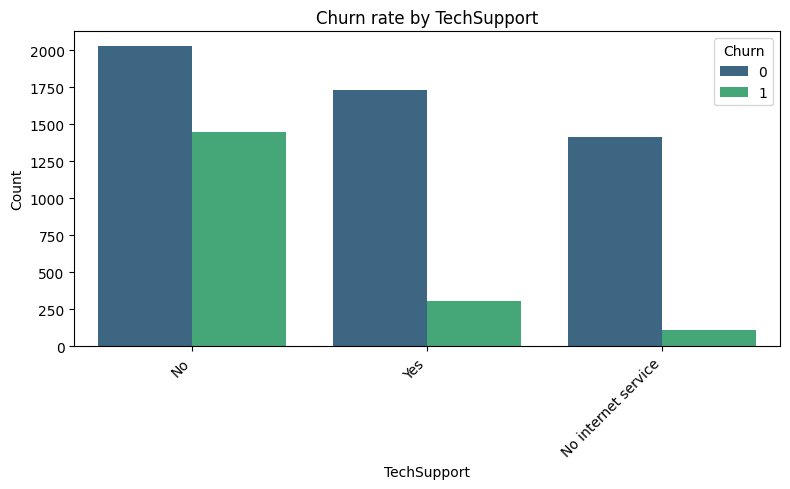

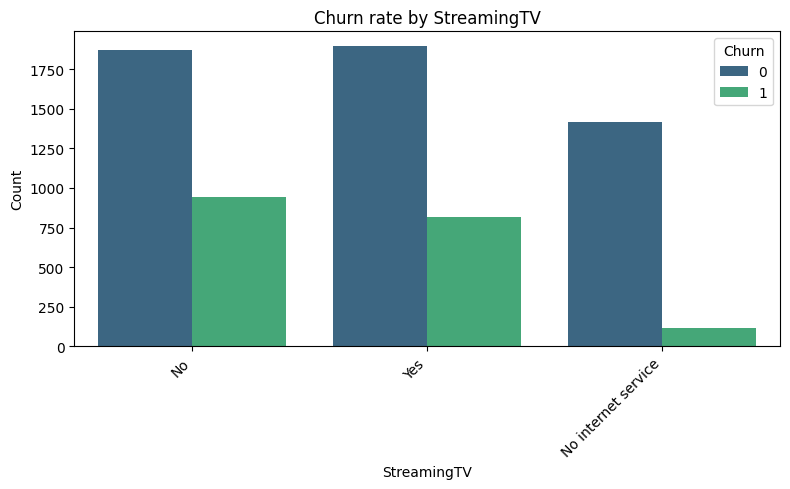

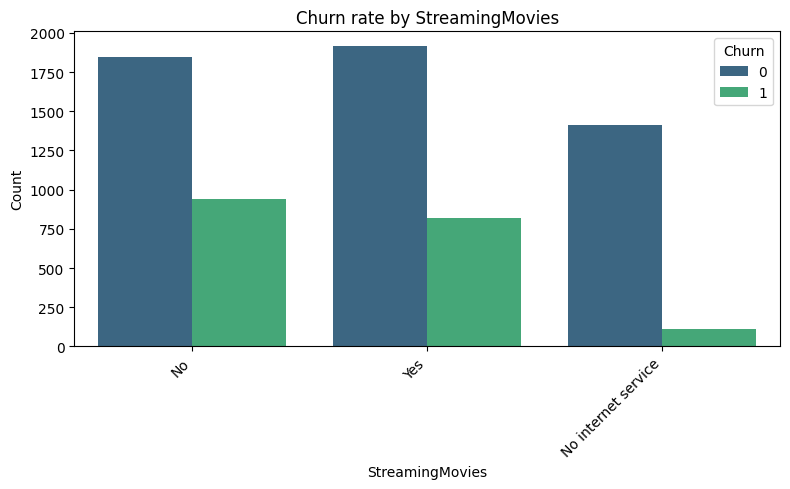

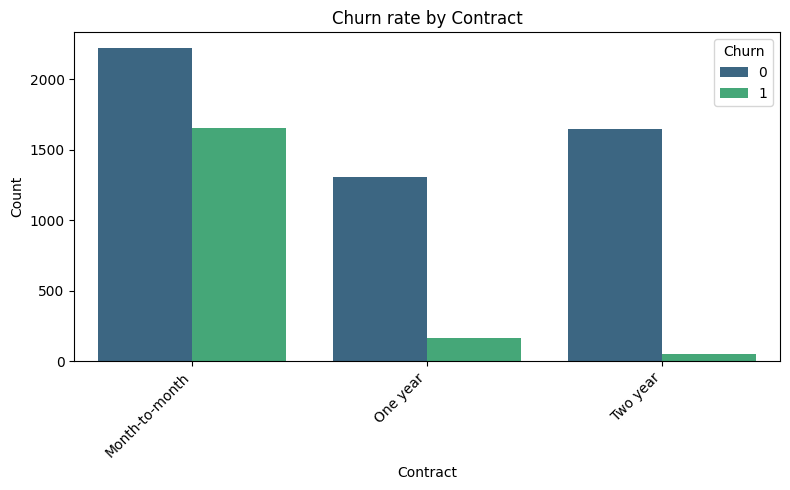

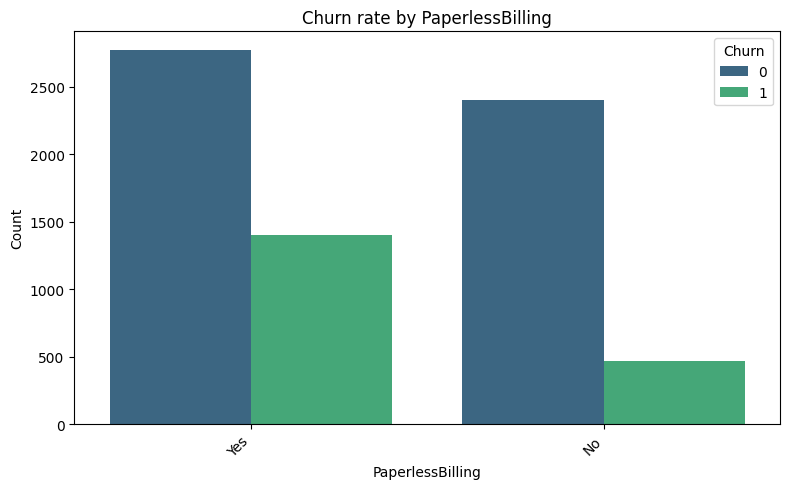

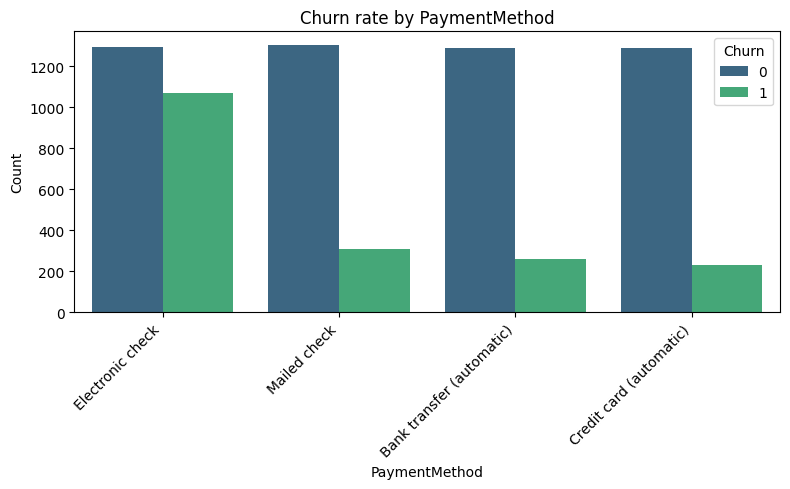

In [9]:
if df is not None:
    print("\n--- Visualising Churn vs. Categorical Features ---")
    # Loop through categorical features and plot churn rates
    for col in categorical_features:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=col, hue='Churn', data=df, palette='viridis')
        plt.title(f'Churn rate by {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

In [10]:
# Phase 2: Data Preprocessing and Feature Engineering

# 1. Import Additional Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("Additional preprocessing libraries imported successfully.")

Additional preprocessing libraries imported successfully.


In [11]:
# 2. Define Features (X) and Target (y)
# X will contain all features except 'Churn' (independent variables)
# y will contain the 'Churn' target variable (dependent variable to predict)

X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (7043, 19)
Shape of target (y): (7043,)


In [12]:
# 3. Identify Categorical and Numerical Features
# Re-identifying them ensures they are based on the X DataFrame and to be explicit about what is being processed

categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical features for preprocessing: {categorical_features}")
print(f"\nNumerical features for preprocessing: {numerical_features}")


Categorical features for preprocessing: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Numerical features for preprocessing: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [13]:
# 4. Create Preprocessing Pipelines

# Numerical pipeline: StandardScaler is applied to numerical features as it transforms data to have a mean of 0 and
# a standard deviation of 1. This helps machine learning algorithms that are sensitive to feature scales e.g. Logistic
# Regression, SVMs.

numerical_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ])

# Categorical pipeline: OneHotEncoder is applied to categorical features as it converts categorical variables into a
# format that can be provided to machine learning algorithms. Each category becomes a new binary column of 0s and 1s.
# handle_unknown='ignore' prevents errors if a new, unseen category appears in the test set e.g. if a category was only
# in the training data and not in the test data.

categorical_transformer = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

# Combine preprocessing steps using ColumnTransformer
# Allows applying different transformers to different columns of the DataFrame.
# 'num': applies numerical_transformer to numerical_features
# 'cat': applies categorical_transformer to categorical_features

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("\nPreprocessing pipelines created.")


Preprocessing pipelines created.


In [14]:
# 5. Split the Data into Training and Testing Sets
# Divides the dataset into two subsets:
# - X_train, y_train: Used for training the machine learning model.
# - X_test, y_test: Used for evaluating the trained model on unseen data.
# test_size=0.2: 20% of the data will be used for testing, 80% for training.
# random_state=42: Ensures reproducibility so that running the same code multiple times yields the same split.
# stratify=y: Crucial for classification problems, especially with imbalanced classes (such as churn) - to ensure that the
# proportion of 'Yes' (churned) and 'No' (non-churned) customers is approximately the same in both the training and testing
# sets as it is in the original dataset.

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nTraining set shape (X_train): {X_train.shape}")
print(f"Testing set shape (X_test): {X_test.shape}")
print(f"Training target shape (y_train): {y_train.shape}")
print(f"Testing target shape (y_test): {y_test.shape}")


Training set shape (X_train): (5634, 19)
Testing set shape (X_test): (1409, 19)
Training target shape (y_train): (5634,)
Testing target shape (y_test): (1409,)


In [15]:
# 6. Apply Preprocessing to Training and Testing Data
# fit_transform on X_train: The preprocessor learns the scaling parameters (mean, std dev) and one-hot encoding
# categories from the training data, and then transform X_train.
# transform on X_test: The preprocessor uses the learned parameters from the training data to transform the test data.
# This prevents data leakage from the test set into the training process.

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding for better interpretability later by constructing the new column names after
# one-hot encoding, which can be many.

feature_names = []

for name, transformer, features in preprocessor.transformers_:
    # Keep the names for numerical features
    if name == 'num':
        feature_names.extend(features)

    # Get the new one-hot encoded names for categorical features
    elif name == 'cat':
        # .named_steps['onehot']: Accesses the OneHotEncoder within the categorical_transformer pipeline.
        # .get_feature_names_out(features): Gets the new column names e.g. 'gender_Female', 'gender_Male'
        ohe_feature_names = transformer.named_steps['onehot'].get_feature_names_out(features)
        feature_names.extend(ohe_feature_names)

# Convert processed NumPy arrays back to Pandas DataFrames for easier inspection and future use to make easier to view
# the data with column headers.

X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

print("\nData preprocessing complete.")
print(f"Shape of processed training features: {X_train_processed_df.shape}")
print(f"Shape of processed testing features: {X_test_processed_df.shape}")
print("\nFirst 5 rows of processed training data (showing new features):")
print(X_train_processed_df.head())
print("\nDescriptive statistics of processed training data:")
print(X_train_processed_df.describe())


Data preprocessing complete.
Shape of processed training features: (5634, 45)
Shape of processed testing features: (1409, 45)

First 5 rows of processed training data (showing new features):
      SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Female  \
3738      -0.441773  0.102371       -0.521976     -0.262257            0.0   
3151      -0.441773 -0.711743        0.337478     -0.503635            0.0   
4860      -0.441773 -0.793155       -0.809013     -0.749883            0.0   
3867      -0.441773 -0.263980        0.284384     -0.172722            1.0   
3810      -0.441773 -1.281624       -0.676279     -0.989374            0.0   

      gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
3738          1.0         1.0          0.0            1.0             0.0   
3151          1.0         0.0          1.0            0.0             1.0   
4860          1.0         0.0          1.0            0.0             1.0   
3867          0.0         0.0  

In [16]:
# Phase 3: Model Building and Evaluation

# Import Additional Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("Additional preprocessing libraries imported successfully.")

# Ensure the preprocessed DataFrames exist from previous cells
if 'X_train_processed_df' not in locals() or X_train_processed_df is None:
    print("Processed DataFrames (X_train_processed_df, X_test_processed_df, y_train, y_test) not found.")
    print("Please ensure all previous phases have been run.")
    raise SystemExit("Exiting: Missing preprocessed data for modelling.")

Additional preprocessing libraries imported successfully.


In [17]:
print("\n--- Logistic Regression Model ---")

# 1. Initialise and Train the Logistic Regression Model
# As Logistic Regression is simple, interpretable and computationally efficient, it is a good baseline model for
# binary classification.
# random_state ensures reproducibility of the model's internal randomness, if any.
# solver='liblinear': Good for small datasets and binary classification.

model_lr = LogisticRegression(random_state=42, solver='liblinear')

print("\nTraining Logistic Regression model...")
model_lr.fit(X_train_processed_df, y_train)
print("Model training complete.")


--- Logistic Regression Model ---

Training Logistic Regression model...
Model training complete.


In [18]:
# 2. Make Predictions on the Test Set

# Predict churn labels (0 or 1) for the unseen test data
y_pred_lr = model_lr.predict(X_test_processed_df)

# Predict probabilities of churn
# To determine the probability of the positive class (churn=1)
y_pred_proba_lr = model_lr.predict_proba(X_test_processed_df)[:, 1]

print("\nPredictions made on the test set for Logistic Regression.")


Predictions made on the test set for Logistic Regression.


In [19]:
# 3. Evaluate Model Performance
print("\n--- Logistic Regression Model Evaluation Metrics ---")

# Accuracy: Proportion of correctly classified instances (both churn and non-churn)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.4f}")

# Precision: Of all instances predicted positive (churn), how many were actually positive?
# Important when the cost of False Positives (predicting churn when they are not) is high
precision_lr = precision_score(y_test, y_pred_lr)
print(f"Precision: {precision_lr:.4f}")

# Recall (Sensitivity): Of all actual positive instances (actual churn), how many were correctly predicted as positive?
# Important when the cost of False Negatives (failing to predict actual churn) is high
recall_lr = recall_score(y_test, y_pred_lr)
print(f"Recall: {recall_lr:.4f}")

# F1 Score: Harmonic mean of Precision and Recall
# Useful when a balance between both metrics is needed, especially with uneven class distribution
f1_lr = f1_score(y_test, y_pred_lr)
print(f"F1 Score: {f1_lr:.4f}")


--- Logistic Regression Model Evaluation Metrics ---
Accuracy: 0.8055
Precision: 0.6572
Recall: 0.5588
F1 Score: 0.6040



--- Logistic Regression Confusion Matrix ---
[[926 109]
 [165 209]]


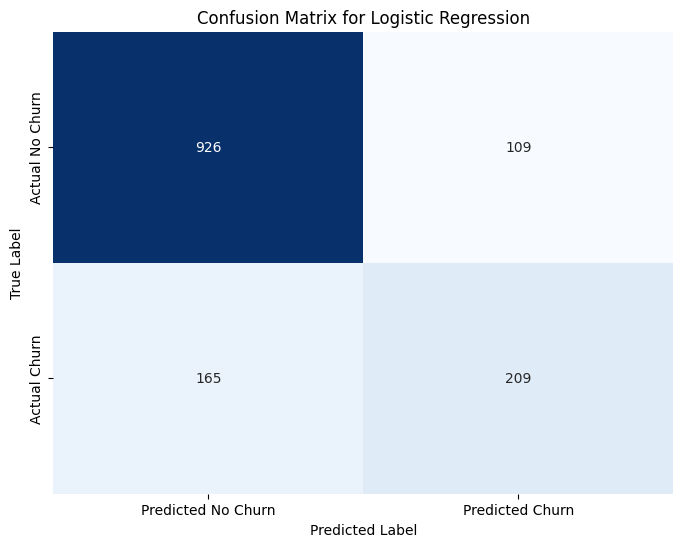

In [20]:
# 4. Visualise the Confusion Matrix for Logistic Regression
# A Confusion Matrix provides a detailed breakdown of correct and incorrect predictions.
# True Negative (TN): Correctly predicted non-churn.
# False Positive (FP): Predicted churn, but actually non-churn (Type I error).
# False Negative (FN): Predicted non-churn, but actually churn (Type II error).
# True Positive (TP): Correctly predicted churn.
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("\n--- Logistic Regression Confusion Matrix ---")
print(cm_lr)

# Display the Confusion Matrix visually
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [21]:
print("\n--- Decision Tree Classifier ---")

# 1. Initialise and Train the Decision Tree Model
# Decision Trees are non-parametric models that can capture non-linear relationships.
# random_state ensures reproducibility of the model's internal randomness, if any.
# max_depth can be used to control overfitting (e.g. max_depth=5)

model_dt = DecisionTreeClassifier(random_state=42)

print("\nTraining Decision Tree model...")
model_dt.fit(X_train_processed_df, y_train)
print("Model training complete.")


--- Decision Tree Classifier ---

Training Decision Tree model...
Model training complete.


In [22]:
# 2. Make Predictions on the Test Set
y_pred_dt = model_dt.predict(X_test_processed_df)

print("Predictions made on the test set for Decision Tree.")

Predictions made on the test set for Decision Tree.


In [23]:
# 3. Evaluate Decision Tree Model Performance
print("\n--- Decision Tree Model Evaluation Metrics ---")

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.4f}")

precision_dt = precision_score(y_test, y_pred_dt)
print(f"Precision: {precision_dt:.4f}")

recall_dt = recall_score(y_test, y_pred_dt)
print(f"Recall: {recall_dt:.4f}")

f1_dt = f1_score(y_test, y_pred_dt)
print(f"F1 Score: {f1_dt:.4f}")


--- Decision Tree Model Evaluation Metrics ---
Accuracy: 0.7211
Precision: 0.4755
Recall: 0.4920
F1 Score: 0.4836



--- Decision Tree Confusion Matrix ---
[[832 203]
 [190 184]]


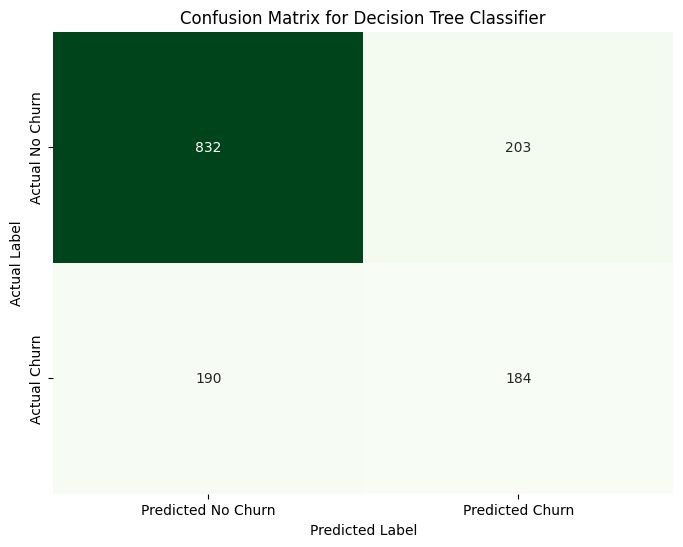

In [24]:
# 4. Visualise the Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("\n--- Decision Tree Confusion Matrix ---")
print(cm_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [25]:
print("\n--- Random Forest Classifier ---")

# 1. Initialise and Train the Decision Tree Model
# Random Forest is an ensemble method that builds multiple decision trees and merges predictions to get a more accurate
# and stable prediction. It generally performs better than a single decision tree and is less prone to overfitting.
# n_estimators: Number of trees in the forest.
# random_state ensures reproducibility of the model's internal randomness, if any.

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

print("\nTraining Random Forest model...")
model_rf.fit(X_train_processed_df, y_train)
print("Model training complete.")


--- Random Forest Classifier ---

Training Random Forest model...
Model training complete.


In [26]:
# 2. Make Predictions on the Test Set
y_pred_rf = model_rf.predict(X_test_processed_df)
print("Predictions made on the test set for Random Forest.")

Predictions made on the test set for Random Forest.


In [27]:
# 3. Evaluate Random Forest Model Performance
print("\n--- Random Forest Model Evaluation Metrics ---")

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

precision_rf = precision_score(y_test, y_pred_rf)
print(f"Precision: {precision_rf:.4f}")

recall_rf = recall_score(y_test, y_pred_rf)
print(f"Recall: {recall_rf:.4f}")

f1_rf = f1_score(y_test, y_pred_rf)
print(f"F1 Score: {f1_rf:.4f}")


--- Random Forest Model Evaluation Metrics ---
Accuracy: 0.7864
Precision: 0.6254
Recall: 0.4866
F1 Score: 0.5474



--- Random Forest Confusion Matrix ---
[[926 109]
 [192 182]]


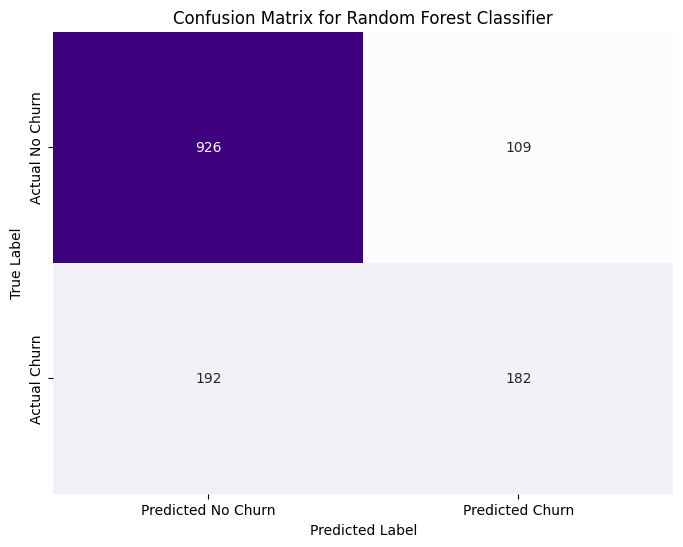

In [28]:
# 4. Visualise the Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\n--- Random Forest Confusion Matrix ---")
print(cm_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


--- Model Performance Comparison ---

-- Summary of Model Performance Metrics --
                     Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.8055     0.6572  0.5588    0.6040
Decision Tree          0.7211     0.4755  0.4920    0.4836
Random Forest          0.7864     0.6254  0.4866    0.5474

-- Visualising Model Performance Comparison-- 


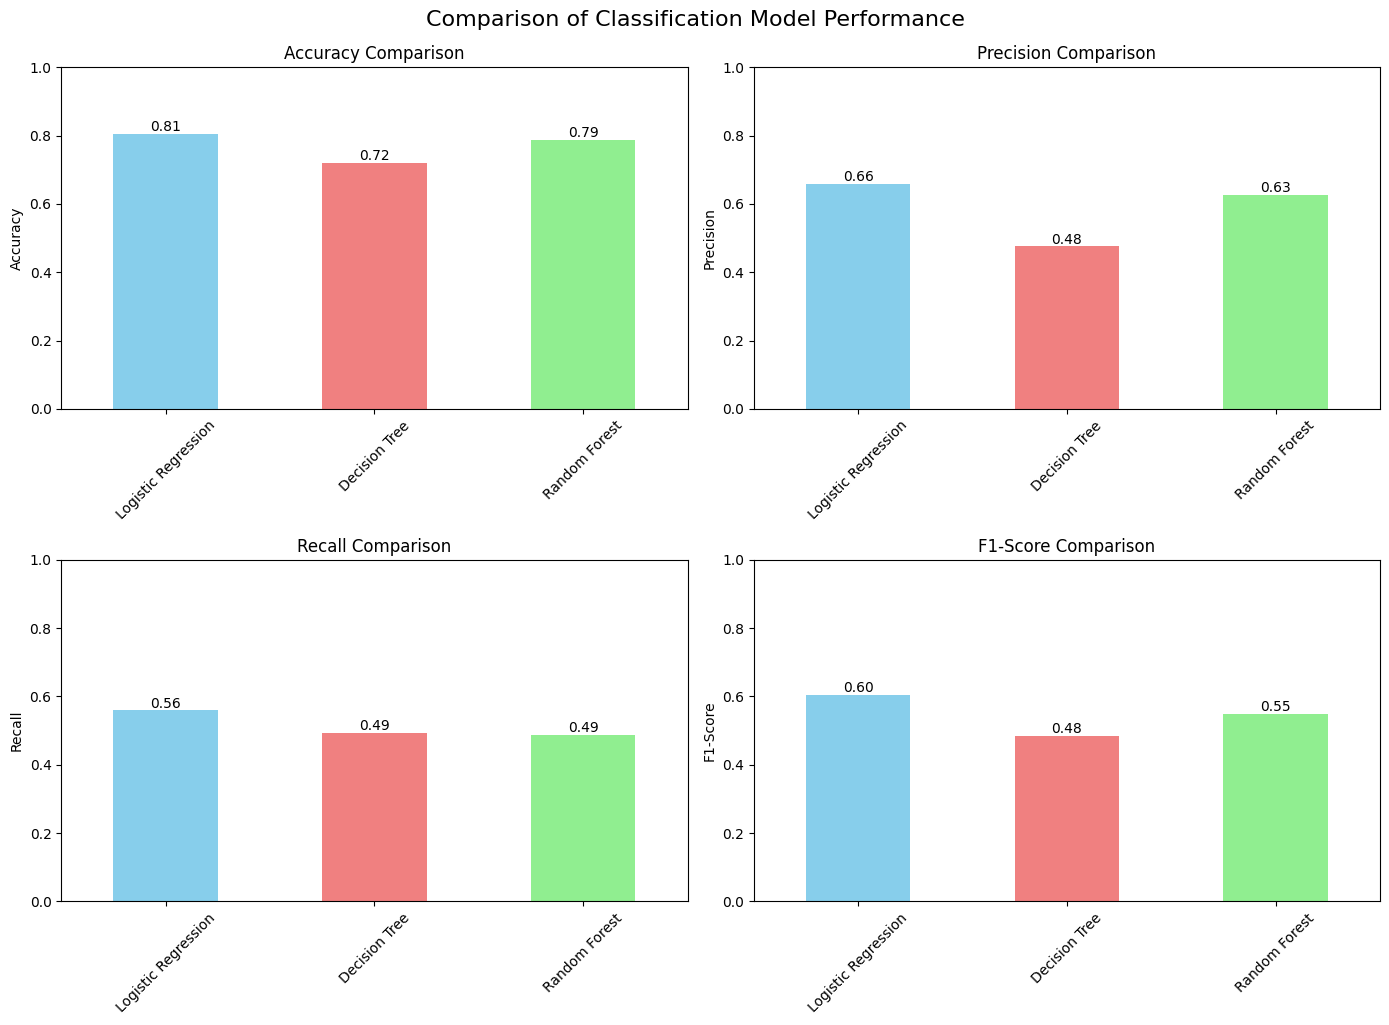

In [29]:
print("\n--- Model Performance Comparison ---")

# Create a dictionary to store the metrics for each model
model_performance = {
    'Logistic Regression': {
        'Accuracy': accuracy_lr,
        'Precision': precision_lr,
        'Recall': recall_lr,
        'F1-Score': f1_lr
    },
    'Decision Tree': {
        'Accuracy': accuracy_dt,
        'Precision': precision_dt,
        'Recall': recall_dt,
        'F1-Score': f1_dt
    },
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1-Score': f1_rf
    }
}

# Convert the dictionary to a Pandas DataFrame for easy viewing
# .T transposes the DataFrame for better readability
performance_df = pd.DataFrame(model_performance).T

print("\n-- Summary of Model Performance Metrics --")
# Display metrics rounded to 4 decimal places
print(performance_df.round(4))

# Visualise the comparison using bar plots
print("\n-- Visualising Model Performance Comparison-- ")

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten() # flatten the 2x2 array of axes for easy iteration

for i, metric in enumerate(metrics_to_plot):
    performance_df[metric].plot(kind='bar', ax=axes[i], color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1) # metrics are used between 0 and 1
    axes[i].tick_params(axis='x', rotation=45)
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.suptitle('Comparison of Classification Model Performance', y=1.02, fontsize=16)
plt.show()

In [30]:
# Phase 4: Hyperparameter Tuning and Cross-Validation

# 1. Import Additional Libraries
from sklearn.model_selection import GridSearchCV, StratifiedKFold

print("Additional hyperparameter tuning and cross validation libraries imported successfully.")

# Ensure the processed DataFrames exist from previous cells
if 'X_train_processed_df' not in locals() or X_train_processed_df is None:
    print("Processed DataFrames (X_train_processed_df, y_train) not found.")
    print("Please ensure all previous phases have been run.")
    raise SystemExit("Exiting: Missing preprocessed data for tuning.")

Additional hyperparameter tuning and cross validation libraries imported successfully.


In [31]:
# 2. Define Cross-Validation Strategy
# StratifiedKFold is crucial for classification problems with imbalanced classes (such as churn). It ensures that each
# fold of the cross-validation split has roughly the same proportion of target classes as the full dataset.
# n_splits: Number of folds e.g. 5-10 (which is common).
# shuffle=True: Shuffles the data before splitting into folds.
# random_state ensures reproducibility of the model's internal randomness, if any.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print(f"\nCross-validation strategy defined with {cv_strategy.n_splits} splits.")


Cross-validation strategy defined with 5 splits.


In [32]:
# 3. Hyperparameter Tuning for Logistic Regression
print("\n--- Hyperparameter Tuning for Logistic Regression ---")

# Define the parameter grid to search
# C: Inverse of regularisation strength. Smaller values specify stronger regularisation. Regularisation helps to
# prevent overfitting.
# solver: Algorithm to use in the optimisation problem.
# - 'liblinear' is good for small datasets.
# - 'saga' is a good choice for larger datasets and supports L1 regularisation.
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initialise Logistic Regression model
# max_iter: Ensures convergence for 'saga'
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Setup GridSearchCV
# estimator: The model to tune.
# param_grid: The dictionary of parameters to search.
# cv: The cross-validation strategy.
# scoring: The metric to optimise during tuning.
# - 'f1' is a good choice for imbalanced churn data as it optimises for F1-score.
# verbose: Controls the verbosity of the output.
# n_jobs: Number of CPU cores to use. -1 means all available.
grid_search_lr = GridSearchCV(estimator=lr_model,
                              param_grid=param_grid_lr,
                              cv=cv_strategy,
                              scoring='f1',
                              verbose=1,
                              n_jobs=-1
                             )

# Fit GridSearchCV to the training data
print("Performing Grid Search for Logistic Regression...")
grid_search_lr.fit(X_train_processed_df, y_train)

# Get the best parameters and best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_
best_model_lr = grid_search_lr.best_estimator_

print(f"\nBest parameters for Logistic Regression: {best_params_lr}")
print(f"Best cross-validation F1-score for Logistic Regression: {best_score_lr:.4f}")

# Evaluate the best Logistic Regression model on the test set
y_pred_best_lr = best_model_lr.predict(X_test_processed_df)


--- Hyperparameter Tuning for Logistic Regression ---
Performing Grid Search for Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters for Logistic Regression: {'C': 100, 'solver': 'liblinear'}
Best cross-validation F1-score for Logistic Regression: 0.5974


In [33]:
print("\n--- Tuned Logistic Regression Model Evaluation on Test Set ---")

accuracy_best_lr = accuracy_score(y_test, y_pred_best_lr)
precision_best_lr = precision_score(y_test, y_pred_best_lr)
recall_best_lr = recall_score(y_test, y_pred_best_lr)
f1_best_lr = f1_score(y_test, y_pred_best_lr)

print(f"Accuracy (Tuned LR): {accuracy_best_lr:.4f}")
print(f"Precision (Tuned LR): {precision_best_lr:.4f}")
print(f"Recall (Tuned LR): {recall_best_lr:.4f}")
print(f"F1-Score (Tuned LR): {f1_best_lr:.4f}")


--- Tuned Logistic Regression Model Evaluation on Test Set ---
Accuracy (Tuned LR): 0.8013
Precision (Tuned LR): 0.6478
Recall (Tuned LR): 0.5508
F1-Score (Tuned LR): 0.5954


In [34]:
# 4. Hyperparameter Tuning for Decision Tree Classifier
print("\n--- Hyperparameter Tuning for Decision Tree Classifier ---")

# Define the parameter grid to search for Decision Tree
# max_depth: The maximum depth of the tree. It controls overfitting.
# - None means unlimited depth.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node.
# criterion: The function to measure the quality of a split.
# - Gini impurity or information gain
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialise Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Setup GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt_model,
                              param_grid=param_grid_dt,
                              cv=cv_strategy,
                              scoring='f1',
                              verbose=1,
                              n_jobs=-1
                             )

# Fit GridSearchCV to the training data
print("Performing Grid Search for Decision Tree...")
grid_search_dt.fit(X_train_processed_df, y_train)

# Get the best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_
best_model_dt = grid_search_dt.best_estimator_

print(f"\nBest parameters for Decision Tree: {best_params_dt}")
print(f"Best cross-validation F1-score for Decision Tree: {best_score_dt:.4f}")

# Evaluate the best Decision Tree model on the test set
y_pred_best_dt = best_model_dt.predict(X_test_processed_df)


--- Hyperparameter Tuning for Decision Tree Classifier ---
Performing Grid Search for Decision Tree...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation F1-score for Decision Tree: 0.5703


In [35]:
print("\n--- Tuned Decision Tree Model Evaluation on Test Set ---")

accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
precision_best_dt = precision_score(y_test, y_pred_best_dt)
recall_best_dt = recall_score(y_test, y_pred_best_dt)
f1_best_dt = f1_score(y_test, y_pred_best_dt)

print(f"Accuracy (Tuned DT): {accuracy_best_dt:.4f}")
print(f"Precision (Tuned DT): {precision_best_dt:.4f}")
print(f"Recall (Tuned DT): {recall_best_dt:.4f}")
print(f"F1-Score (Tuned DT): {f1_best_dt:.4f}")


--- Tuned Decision Tree Model Evaluation on Test Set ---
Accuracy (Tuned DT): 0.7970
Precision (Tuned DT): 0.6310
Recall (Tuned DT): 0.5668
F1-Score (Tuned DT): 0.5972


In [36]:
# 5. Hyperparameter Tuning for Random Forest Classifier
print("/n--- Hyperparameter Tuning for Random Forest Classifier ---")

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialise Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Setup GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model,
                              param_grid=param_grid_rf,
                              cv=cv_strategy,
                              scoring='f1',
                              verbose=1,
                              n_jobs=-1
                             )

# Fit GridSearchCV to the training data
print("Performing Grid Search for Random Forest...")
grid_search_rf.fit(X_train_processed_df, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
best_model_rf = grid_search_rf.best_estimator_

print(f"\nBest parameters for Random Forest: {best_params_rf}")
print(f"Best cross-validation F1-score for Random Forest: {best_score_rf:.4f}")

# Evaluate the best Random Forest model on the test set
y_pred_best_rf = best_model_rf.predict(X_test_processed_df)

/n--- Hyperparameter Tuning for Random Forest Classifier ---
Performing Grid Search for Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation F1-score for Random Forest: 0.5857


In [37]:
print("\n--- Tuned Random Forest Model Evaluation on Test Set ---")

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)

print(f"Accuracy (Tuned RF): {accuracy_best_rf:.4f}")
print(f"Precision (Tuned RF): {precision_best_rf:.4f}")
print(f"Recall (Tuned RF): {recall_best_rf:.4f}")
print(f"F1-Score (Tuned RF): {f1_best_rf:.4f}")


--- Tuned Random Forest Model Evaluation on Test Set ---
Accuracy (Tuned RF): 0.8048
Precision (Tuned RF): 0.6737
Recall (Tuned RF): 0.5134
F1-Score (Tuned RF): 0.5827



--- Model Performance Comparison ---

-- Summary of Model Performance Metrics --
                             Accuracy  Precision  Recall  F1-Score
Logistic Regression (Tuned)    0.8013     0.6478  0.5508    0.5954
Decision Tree (Tuned)          0.7970     0.6310  0.5668    0.5972
Random Forest (Tuned)          0.8048     0.6737  0.5134    0.5827

-- Visualising Model Performance Comparison-- 


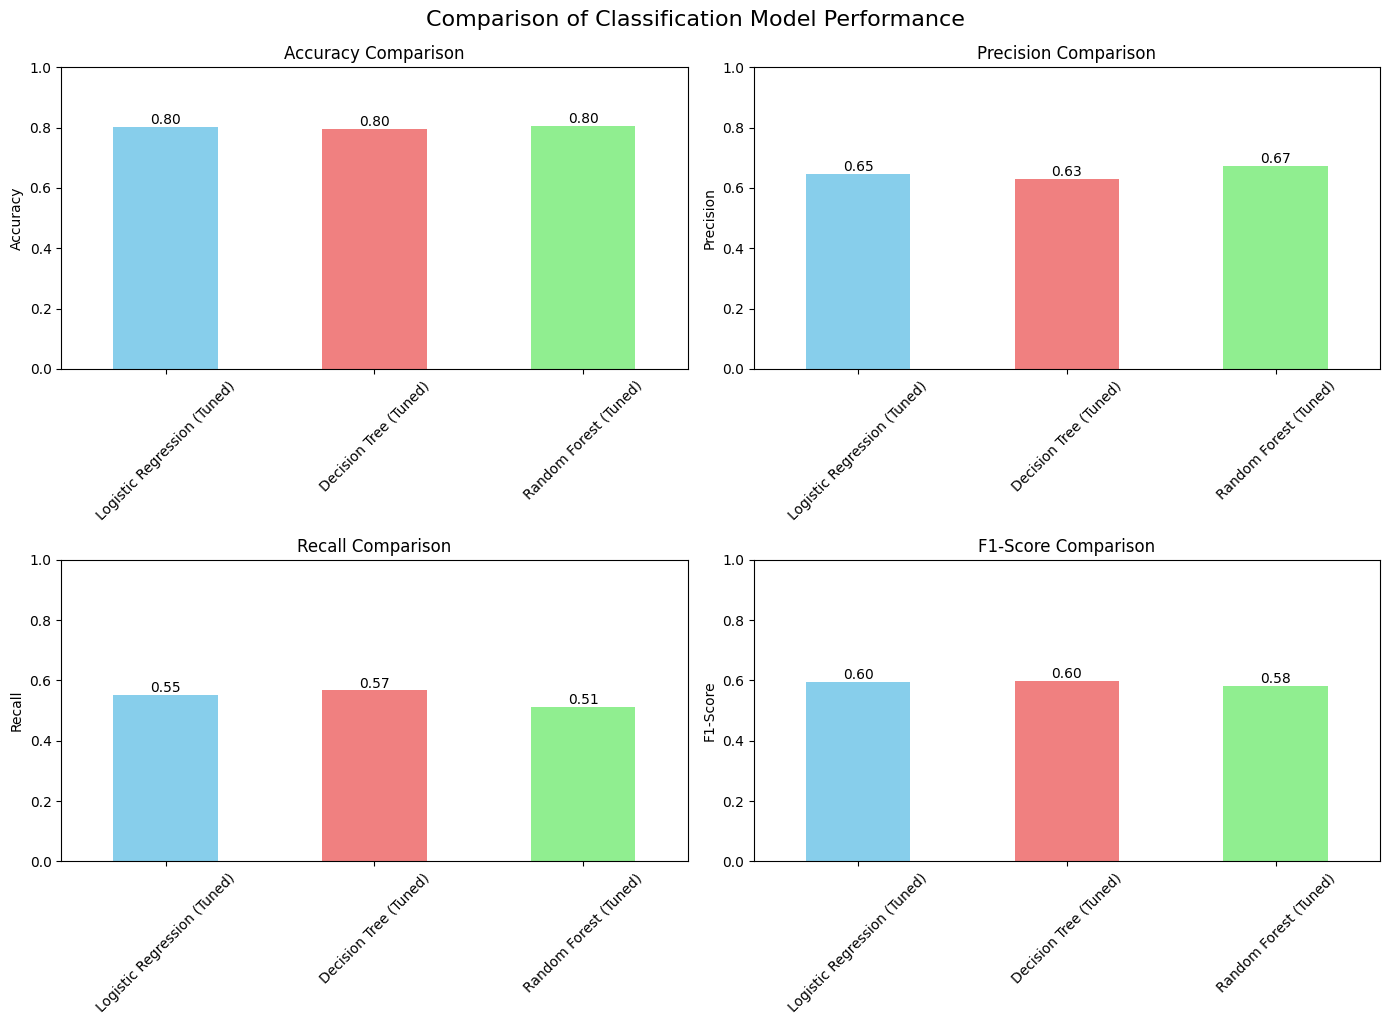

In [38]:
print("\n--- Model Performance Comparison ---")

# Create a dictionary to store the metrics for each tuned model
model_performance = {
    'Logistic Regression (Tuned)': {
        'Accuracy': accuracy_best_lr,
        'Precision': precision_best_lr,
        'Recall': recall_best_lr,
        'F1-Score': f1_best_lr
    },
    'Decision Tree (Tuned)': {
        'Accuracy': accuracy_best_dt,
        'Precision': precision_best_dt,
        'Recall': recall_best_dt,
        'F1-Score': f1_best_dt
    },
    'Random Forest (Tuned)': {
        'Accuracy': accuracy_best_rf,
        'Precision': precision_best_rf,
        'Recall': recall_best_rf,
        'F1-Score': f1_best_rf
    }
}

# Convert the dictionary to a Pandas DataFrame for easy viewing
# .T transposes the DataFrame for better readability
performance_df = pd.DataFrame(model_performance).T

print("\n-- Summary of Model Performance Metrics --")
# Display metrics rounded to 4 decimal places
print(performance_df.round(4))

# Visualise the comparison using bar plots
print("\n-- Visualising Model Performance Comparison-- ")

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten() # flatten the 2x2 array of axes for easy iteration

for i, metric in enumerate(metrics_to_plot):
    performance_df[metric].plot(kind='bar', ax=axes[i], color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1) # metrics are used between 0 and 1
    axes[i].tick_params(axis='x', rotation=45)
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.suptitle('Comparison of Classification Model Performance', y=1.02, fontsize=16)
plt.show()

In [39]:
# Phase 5: ROC Curve and AUC Analysis

# 1. Import Additional Libraries
from sklearn.metrics import roc_curve, roc_auc_score

print("Additional ROC/AUC analysis libraries imported successfully.")

# Ensure the processed DataFrames exist from previous cells
if 'X_test_processed_df' not in locals() or X_test_processed_df is None or \
    'y_test' not in locals() or y_test is None or \
    'best_model_lr' not in locals() or best_model_lr is None or \
    'best_model_dt' not in locals() or best_model_dt is None or \
    'best_model_rf' not in locals() or best_model_rf is None:
    print("Required data or best models not found. Please ensure all previous phases have been run.")
    raise SystemExit("Exiting: Missing data or models for ROC/AUC analysis.")

Additional ROC/AUC analysis libraries imported successfully.


In [40]:
# 2. Get Predicted Probabilities for Each Tuned Model
# ROC curves require probabilities of the positive class (churn=1)
y_pred_proba_lr = best_model_lr.predict_proba(X_test_processed_df)[:, 1]
y_pred_proba_dt = best_model_dt.predict_proba(X_test_processed_df)[:, 1]
y_pred_proba_rf = best_model_rf.predict_proba(X_test_processed_df)[:, 1]

print("\nPredicted probabilities generated for all tuned models.")


Predicted probabilities generated for all tuned models.


In [41]:
# 3. Generate ROC Curve and Calculate AUC Score for Each Model

# Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"\nAUC Score (Tuned Logistic Regression): {auc_lr:.4f}")
print(f"AUC Score (Tuned Decision Tree): {auc_dt:.4f}")
print(f"AUC Score (Tuned Random Forest): {auc_rf:.4f}")


AUC Score (Tuned Logistic Regression): 0.8408
AUC Score (Tuned Decision Tree): 0.8312
AUC Score (Tuned Random Forest): 0.8378


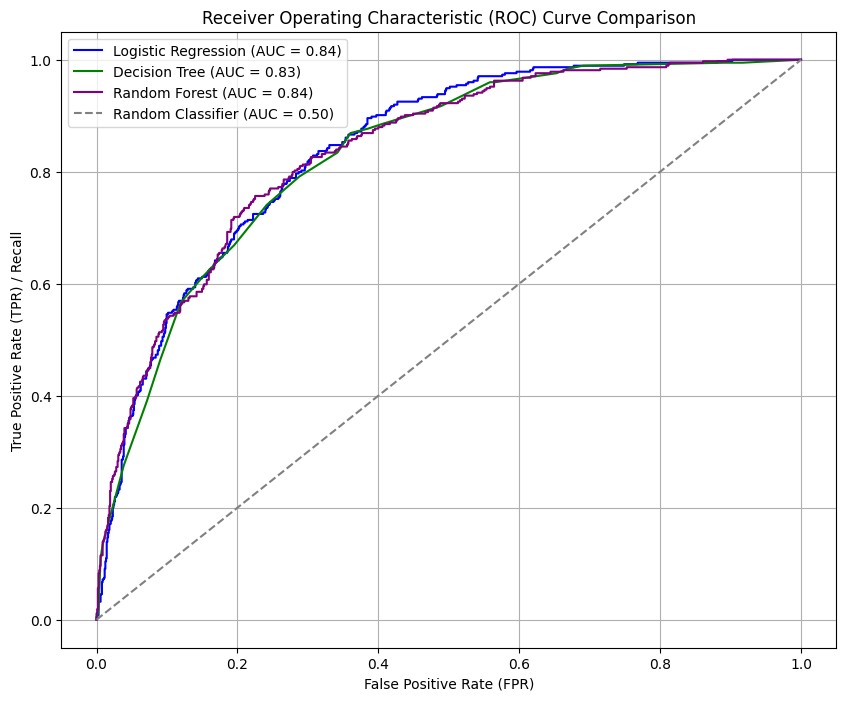

In [42]:
# 4. Visualise ROC Curves
plt.figure(figsize=(10, 8))

# Plot ROC curves for each model
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='green')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='purple')

# Plot the diagonal baseline (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# Phase 6: Addressing Class Imbalance with SMOTE

# 1. Import Additional Libraries
from imblearn.over_sampling import SMOTE
from collections import Counter # to check class distribution

print("Class imbalance handling libraries imported successfully.")

# Ensure processed dataframes and best models exist from previous cells
if (('X_train_processed_df' not in locals() or X_train_processed_df is None) or
    ('y_train' not in locals() or y_train is None) or
    ('X_test_processed_df' not in locals() or X_test_processed_df is None) or
    ('y_test' not in locals() or y_test is None) or
    ('best_model_dt' not in locals() or best_model_dt is None)):
    print("Required data or best model not found. Please ensure all previous phases have been run.")
    raise SystemExit("Exiting: Missing data or model for class imbalance handling.")

Class imbalance handling libraries imported successfully.


In [44]:
# 2. Check Original Class Distribution
print("\n--- Original Training Set Class Distribution ---")
print(Counter(y_train))


--- Original Training Set Class Distribution ---
Counter({0: 4139, 1: 1495})


In [45]:
# 3. Apply SMOTE to the Training Data
# random_state ensures reproducibility of the model's internal randomness, if any.
# sampling_strategy='auto' balances the classes to have an equal number of samples
smote = SMOTE(random_state=42)

print("\nApplying SMOTE to the training data...")
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed_df, y_train)
print("SMOTE resampling complete.")


Applying SMOTE to the training data...
SMOTE resampling complete.


In [46]:
# 4. Check Resampled Class Distribution
print("\n--- Resampled Training Set Class Distribution ---")
print(Counter(y_train_resampled))


--- Resampled Training Set Class Distribution ---
Counter({0: 4139, 1: 4139})


In [47]:
# 5. Retrain the Best Model (Tuned Decision Tree) on Resampled Data
# best_model_dt (tuned Decision Tree) is used as identified in Phase 4.
# Use of the estimator from the best_estimator_ attribute of GridSearchCV is important as this model already has the
# optimal hyperparameters set.
model_dt_resampled = best_model_dt

print("\nRetraining Tuned Decision Tree model on SMOTE-resampled data...")
model_dt_resampled.fit(X_train_resampled, y_train_resampled)
print("Model retraining complete on resampled data.")


Retraining Tuned Decision Tree model on SMOTE-resampled data...
Model retraining complete on resampled data.


In [48]:
# 6. Evaluate the Retrained Model on the Original Test Set
# Evaluate on the original, untouched test set to avoid data leakage
y_pred_dt_resampled = model_dt_resampled.predict(X_test_processed_df)
y_pred_proba_dt_resampled = model_dt_resampled.predict_proba(X_test_processed_df)[:, 1]

accuracy_dt_resampled = accuracy_score(y_test, y_pred_dt_resampled)
precision_dt_resampled = precision_score(y_test, y_pred_dt_resampled)
recall_dt_resampled = recall_score(y_test, y_pred_dt_resampled)
f1_dt_resampled = f1_score(y_test, y_pred_dt_resampled)
auc_dt_resampled = roc_auc_score(y_test, y_pred_proba_dt_resampled)

print("\n--- Tuned Decision Tree Model Evaluation (after SMOTE) on Test Set ---")
print(f"Accuracy (Tuned DT + SMOTE): {accuracy_dt_resampled:.4f}")
print(f"Precision (Tuned DT + SMOTE): {precision_dt_resampled:.4f}")
print(f"Recall (Tuned DT + SMOTE): {recall_dt_resampled:.4f}")
print(f"F1-Score (Tuned DT + SMOTE): {f1_dt_resampled:.4f}")
print(f"AUC Score (Tuned DT + SMOTE): {auc_dt_resampled:.4f}")


--- Tuned Decision Tree Model Evaluation (after SMOTE) on Test Set ---
Accuracy (Tuned DT + SMOTE): 0.7296
Precision (Tuned DT + SMOTE): 0.4938
Recall (Tuned DT + SMOTE): 0.7487
F1-Score (Tuned DT + SMOTE): 0.5951
AUC Score (Tuned DT + SMOTE): 0.8103



--- Confusion Matrix for Tuned Decision Tree (after SMOTE) ---
[[748 287]
 [ 94 280]]


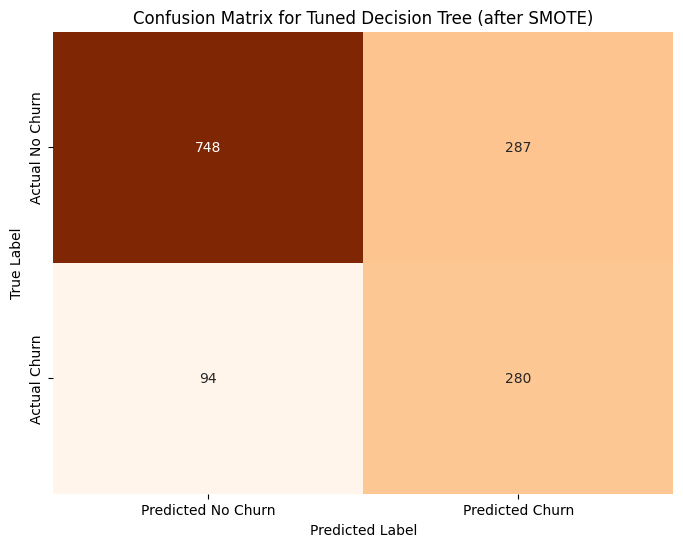

In [49]:
# 7. Visualise Confusion Matrix
print("\n--- Confusion Matrix for Tuned Decision Tree (after SMOTE) ---")
cm_dt_resampled = confusion_matrix(y_test, y_pred_dt_resampled)
print(cm_dt_resampled)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_resampled, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Tuned Decision Tree (after SMOTE)')
plt.show()

In [51]:
# Phase 7: Feature Importance Analysis

# Ensure the best model from Phase 6 (model_dt_resampled) and processed dataframes exist from previous cells
if (('model_dt_resampled' not in locals() or model_dt_resampled is None) or
    ('X_train_processed_df' not in locals() or X_train_processed_df is None)):
    print("Required model or processed training data not found. Please ensure all previous phases have been run.")
    raise SystemExit("Exiting: Missing model or data for feature importance analysis.")

In [55]:
# 1. Extract Feature Importances from the Tuned Decision Tree (after SMOTE)
# Decision Tree models have a 'feature_importances_' attribute.
feature_importances = model_dt_resampled.feature_importances_

# Get the names of the processed features
processed_feature_names = X_train_processed_df.columns

# Create a DataFrame for better visualisation and sorting
importance_df = pd.DataFrame({
    'Feature': processed_feature_names,
    'Importance': feature_importances
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance_df.head(10))


Top 10 Most Important Features:
                           Feature  Importance
36         Contract_Month-to-month    0.566889
18               OnlineSecurity_No    0.106041
43  PaymentMethod_Electronic check    0.098924
35             StreamingMovies_Yes    0.052225
37               Contract_One year    0.039045
1                           tenure    0.038502
20              OnlineSecurity_Yes    0.020704
15             InternetService_DSL    0.018743
27                  TechSupport_No    0.013819
2                   MonthlyCharges    0.012164


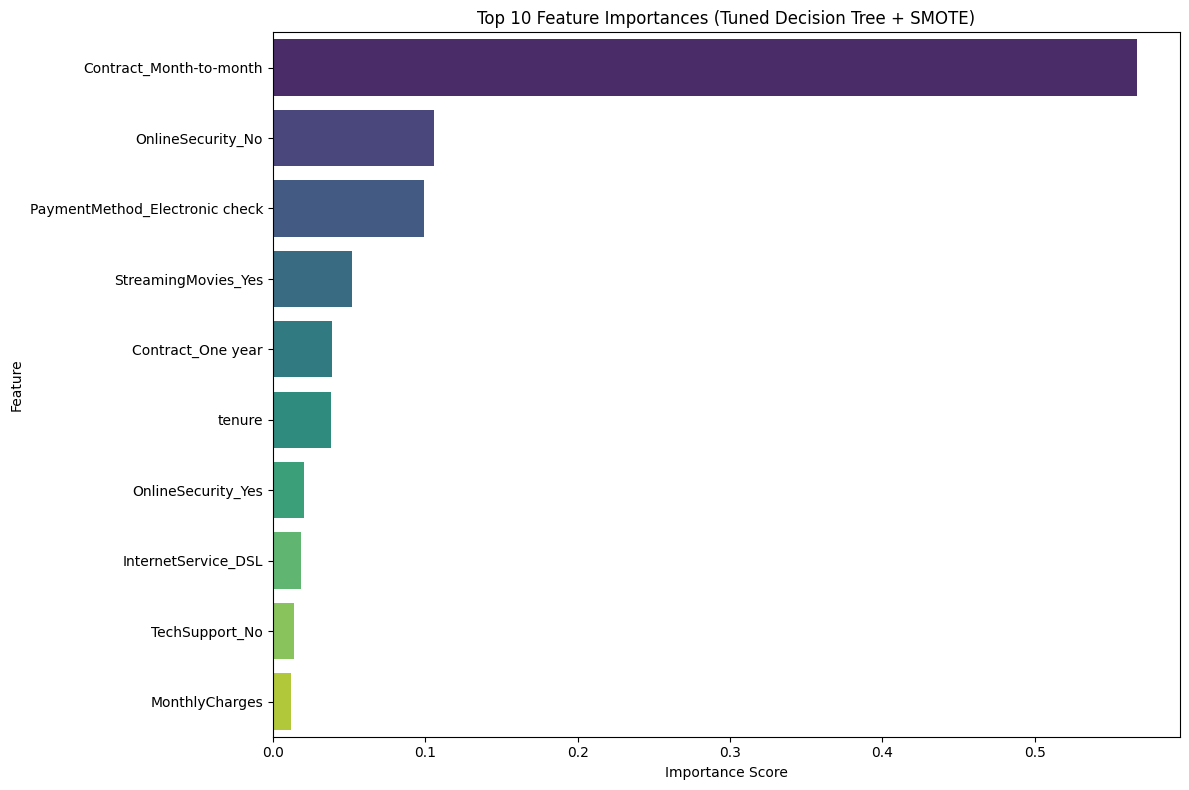

In [56]:
# 3. Visualise Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances (Tuned Decision Tree + SMOTE)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()